In [4]:
import pandas as pd
import yfinance as yf
start_day = '2022-01-01'
assetList = ["CDNS", "CDW", "CE", "CF", "CFG", "CHD", "CHRW", "CHTR", "CI", "CINF"]

In [5]:
def get_One_Asset(company,start_day):
    df = pd.DataFrame()
    returns = yf.Ticker(company)
    data = returns.history(period="1y",start=start_day)
    df.index=data.index
    df[company]=data.Close
    return df

In [6]:
data = pd.DataFrame()
for company in assetList:
    asset = get_One_Asset(company,start_day)
    data = pd.concat([data,asset],axis = 1)

In [7]:
filename = 'myData.csv'
data.to_csv(filename, index=True)

In [1]:
data <- read.csv('myData.csv',header = TRUE)
head(data)

,Date,CDNS,CDW,CE,CF,CFG,CHD,CHRW,CHTR,CI,CINF
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022-01-03 00:00:00-05:00,183.16,199.6417,158.3751,67.62326,43.62605,99.01966,102.0042,647.58,225.3163,106.5016
2,2022-01-04 00:00:00-05:00,178.30,202.6800,162.8099,68.14058,45.60583,99.12675,104.3487,640.77,224.4504,108.9779
3,2022-01-05 00:00:00-05:00,172.62,198.2005,164.3606,66.07136,45.25959,99.82772,103.6680,624.86,227.5483,107.4432
4,2022-01-06 00:00:00-05:00,173.12,200.8103,162.3655,66.32999,47.76316,99.99321,104.8875,631.95,218.9089,109.4299
5,2022-01-07 00:00:00-05:00,166.02,193.1853,162.7059,66.23420,48.13604,100.85966,102.5052,610.49,224.3349,111.7085
6,2022-01-10 00:00:00-05:00,165.88,194.9674,161.0227,64.63439,47.86969,100.08083,101.9475,605.43,224.8256,111.3413


In [2]:
tail(data)

,Date,CDNS,CDW,CE,CF,CFG,CHD,CHRW,CHTR,CI,CINF
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
587,2024-05-03 00:00:00-04:00,281.63,219.56,157.17,74.09,35.39,106.11,81.20,265.93,341.50,116.94
588,2024-05-06 00:00:00-04:00,285.19,221.82,159.08,74.51,35.76,105.41,78.75,271.47,342.41,117.38
589,2024-05-07 00:00:00-04:00,284.04,220.68,162.73,74.99,35.57,106.93,79.53,268.00,346.70,117.20
590,2024-05-08 00:00:00-04:00,282.57,220.32,163.27,73.25,35.95,106.78,80.97,272.78,347.35,117.44
591,2024-05-09 00:00:00-04:00,285.28,222.97,161.42,74.29,36.02,107.05,81.26,263.93,350.97,118.31
592,2024-05-10 00:00:00-04:00,287.48,222.46,156.69,73.95,36.06,107.31,82.72,275.55,348.39,118.87


In [3]:

(nAsset <- dim(data)[2])

[1] 11

In [4]:
(nDays <- dim(data)[1])

[1] 592

In [5]:
Dates <- data[,1]
Dates <- as.Date(Dates, "%Y-%m-%d")
head(Dates)

[1] "2022-01-03" "2022-01-04" "2022-01-05" "2022-01-06" "2022-01-07"
[6] "2022-01-10"

In [ ]:
system('sudo apt-get install -y libglpk-dev', intern=TRUE)
system('sudo apt-get install -y libnlopt-dev', intern=TRUE)
system('sudo apt-get install -y glpk-utils', intern=TRUE)
system("sudo apt install libgsl-dev", intern = TRUE)

In [13]:
install.packages(c("fPortfolio", "xts"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’




In [14]:
library(fPortfolio)
library(quadprog)
library(xts)

Loading required package: zoo


Attaching package: ‘zoo’


The following object is masked from ‘package:timeSeries’:

    time<-


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [15]:
histData <- data[2:nAsset]
sample.xts <- as.xts(histData, order.by = Dates)
head(sample.xts)

             CDNS      CDW       CE       CF      CFG       CHD     CHRW   CHTR
2022-01-03 183.16 199.6417 158.3751 67.62326 43.62605  99.01966 102.0042 647.58
2022-01-04 178.30 202.6800 162.8099 68.14058 45.60583  99.12675 104.3487 640.77
2022-01-05 172.62 198.2005 164.3606 66.07136 45.25959  99.82772 103.6680 624.86
2022-01-06 173.12 200.8103 162.3655 66.32999 47.76316  99.99321 104.8875 631.95
2022-01-07 166.02 193.1853 162.7059 66.23420 48.13604 100.85966 102.5052 610.49
2022-01-10 165.88 194.9674 161.0227 64.63439 47.86969 100.08083 101.9475 605.43
                 CI     CINF
2022-01-03 225.3163 106.5016
2022-01-04 224.4504 108.9779
2022-01-05 227.5483 107.4432
2022-01-06 218.9089 109.4299
2022-01-07 224.3349 111.7085
2022-01-10 224.8256 111.3413

In [16]:
 Lag <- 5
 (testData <- sample.xts[(nDays-Lag):nDays,])

             CDNS    CDW     CE    CF   CFG    CHD  CHRW   CHTR     CI   CINF
2024-05-03 281.63 219.56 157.17 74.09 35.39 106.11 81.20 265.93 341.50 116.94
2024-05-06 285.19 221.82 159.08 74.51 35.76 105.41 78.75 271.47 342.41 117.38
2024-05-07 284.04 220.68 162.73 74.99 35.57 106.93 79.53 268.00 346.70 117.20
2024-05-08 282.57 220.32 163.27 73.25 35.95 106.78 80.97 272.78 347.35 117.44
2024-05-09 285.28 222.97 161.42 74.29 36.02 107.05 81.26 263.93 350.97 118.31
2024-05-10 287.48 222.46 156.69 73.95 36.06 107.31 82.72 275.55 348.39 118.87

In [17]:
 sample.xts <- sample.xts[1:(nDays-Lag),]
 tail(sample.xts)

             CDNS    CDW     CE    CF      CFG    CHD  CHRW   CHTR     CI
2024-04-26 282.41 242.26 154.49 80.00 34.72796 106.32 70.22 254.61 354.47
2024-04-29 282.49 245.94 157.60 80.83 34.56000 106.91 71.70 259.76 356.44
2024-04-30 275.63 241.86 153.61 78.97 34.11000 107.89 71.00 255.94 357.04
2024-05-01 274.55 214.61 154.44 77.97 34.70000 106.26 72.09 259.70 357.18
2024-05-02 276.44 218.41 156.38 73.87 34.99000 105.88 80.93 262.00 344.50
2024-05-03 281.63 219.56 157.17 74.09 35.39000 106.11 81.20 265.93 341.50
             CINF
2024-04-26 110.88
2024-04-29 113.55
2024-04-30 115.69
2024-05-01 117.30
2024-05-02 116.16
2024-05-03 116.94

In [18]:
 nDays <- nDays - Lag

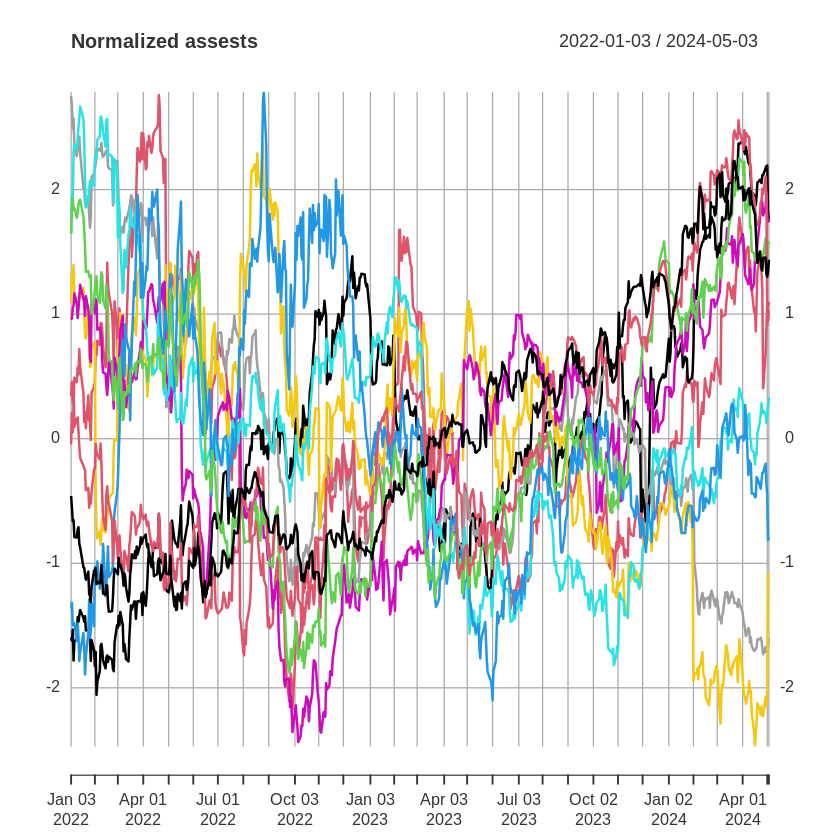

In [19]:
std_data <- scale(sample.xts)
plot(std_data,lty=1,main='Normalized assests',type = "l")

In [20]:
stock.returns <- returns(sample.xts,method = 'discrete')
head(stock.returns)

,CDNS,CDW,CE,CF,CFG,CHD,CHRW,CHTR,CI,CINF
2022-01-04,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2022-01-04,-0.0265341806,0.015218916,0.028001479,0.007650012,0.045380646,0.001081464,0.022984256,-0.01051607,-0.003842865,0.023251684
2022-01-05,-0.0318564657,-0.022101677,0.009525012,-0.030366949,-0.007592034,0.007071487,-0.006522832,-0.02482955,0.013802092,-0.014083284
2022-01-06,0.0028965358,0.013167643,-0.012138934,0.003914502,0.055315807,0.001657748,0.011763490,0.01134658,-0.037967210,0.018491080
2022-01-07,-0.0410119631,-0.037971086,0.002096650,-0.001444214,0.007806834,0.008665063,-0.022712771,-0.03395842,0.024786680,0.020822416
2022-01-10,-0.0008432682,0.009225003,-0.010345027,-0.024153802,-0.005533114,-0.007721933,-0.005441304,-0.00828842,0.002187319,-0.003287288


In [21]:
stock.returns<-stock.returns[2:nDays,]
head(stock.returns)

,CDNS,CDW,CE,CF,CFG,CHD,CHRW,CHTR,CI,CINF
2022-01-04,-0.0265341806,0.015218916,0.028001479,0.007650012,0.045380646,0.001081464,0.022984256,-0.01051607,-0.003842865,0.023251684
2022-01-05,-0.0318564657,-0.022101677,0.009525012,-0.030366949,-0.007592034,0.007071487,-0.006522832,-0.02482955,0.013802092,-0.014083284
2022-01-06,0.0028965358,0.013167643,-0.012138934,0.003914502,0.055315807,0.001657748,0.011763490,0.01134658,-0.037967210,0.018491080
2022-01-07,-0.0410119631,-0.037971086,0.002096650,-0.001444214,0.007806834,0.008665063,-0.022712771,-0.03395842,0.024786680,0.020822416
2022-01-10,-0.0008432682,0.009225003,-0.010345027,-0.024153802,-0.005533114,-0.007721933,-0.005441304,-0.00828842,0.002187319,-0.003287288
2022-01-11,0.0201952661,0.001048650,0.005109078,0.025048163,0.011498593,-0.009533082,0.001298189,0.01101694,0.027600531,0.010401869


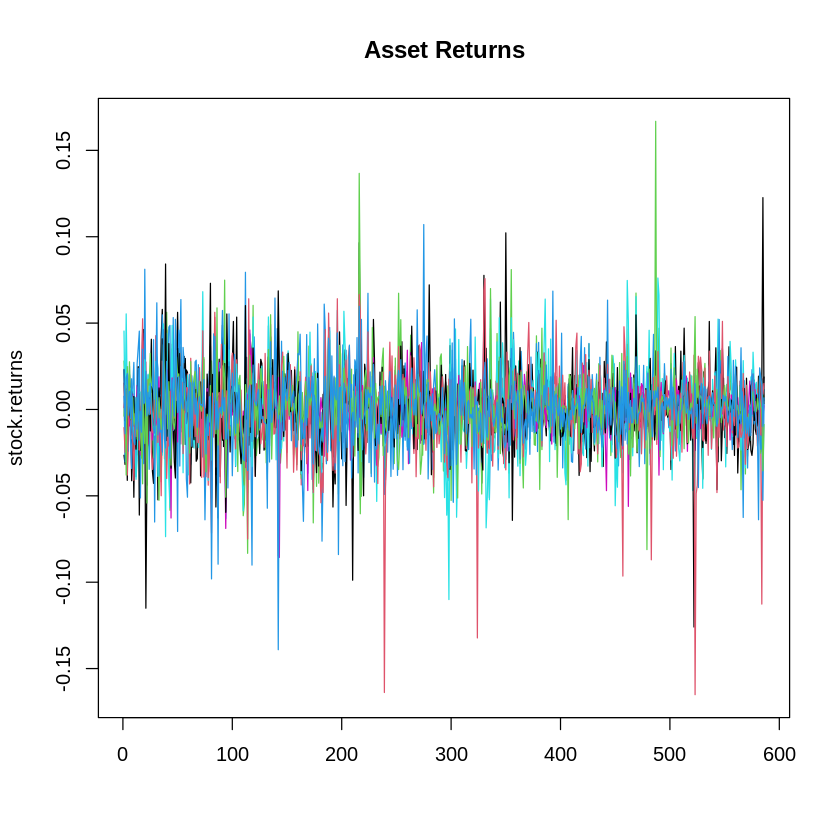

In [22]:
matplot(stock.returns,lty=1,main='Asset Returns',type = "l")

In [23]:
(cov <- cov(stock.returns))

,CDNS,CDW,CE,CF,CFG,CHD,CHRW,CHTR,CI,CINF
CDNS,4.610290e-04,1.998059e-04,1.902411e-04,6.144941e-05,1.370161e-04,4.340495e-05,1.173919e-04,1.457372e-04,6.914764e-05,9.357347e-05
CDW,1.998059e-04,3.038607e-04,2.015209e-04,8.898348e-05,1.745046e-04,4.572749e-05,9.717659e-05,1.381041e-04,7.923367e-05,1.087066e-04
CE,1.902411e-04,2.015209e-04,4.849063e-04,1.416811e-04,3.170437e-04,3.645816e-05,1.481445e-04,2.069895e-04,6.564754e-05,1.737636e-04
CF,6.144941e-05,8.898348e-05,1.416811e-04,6.225246e-04,1.335118e-04,4.878935e-06,9.731567e-05,8.119230e-05,8.160674e-05,1.006068e-04
CFG,1.370161e-04,1.745046e-04,3.170437e-04,1.335118e-04,5.525776e-04,2.298817e-05,1.373764e-04,1.863809e-04,9.180055e-05,1.993984e-04
CHD,4.340495e-05,4.572749e-05,3.645816e-05,4.878935e-06,2.298817e-05,1.766336e-04,3.369708e-05,7.361690e-05,4.739840e-05,5.292417e-05
CHRW,1.173919e-04,9.717659e-05,1.481445e-04,9.731567e-05,1.373764e-04,3.369708e-05,3.852252e-04,8.960654e-05,3.537958e-05,7.594860e-05
CHTR,1.457372e-04,1.381041e-04,2.069895e-04,8.119230e-05,1.863809e-04,7.361690e-05,8.960654e-05,5.485024e-04,4.467564e-05,1.636688e-04
CI,6.914764e-05,7.923367e-05,6.564754e-05,8.160674e-05,9.180055e-05,4.739840e-05,3.537958e-05,4.467564e-05,2.980986e-04,8.668505e-05
CINF,9.357347e-05,1.087066e-04,1.737636e-04,1.006068e-04,1.993984e-04,5.292417e-05,7.594860e-05,1.636688e-04,8.668505e-05,3.252841e-04


In [47]:
 n <- ncol(cov)
  Amat <- matrix (1, nrow=n)
  Amat <- cbind(Amat, -diag(n))
  bvec <- 1
  meq <- 1

In [48]:
max.allocation <- 0.45
bvec <- c(bvec, rep(-max.allocation, n))
bvec

[1]  1.00 -0.45 -0.45 -0.45 -0.45 -0.45 -0.45 -0.45 -0.45 -0.45 -0.45

In [49]:
  risk.premium.up <-0.5
  risk.increment <- 0.01
  (loops <- risk.premium.up / risk.increment + 1)

[1] 51

In [50]:
  loop <- 1

In [51]:
  eff <- matrix(nrow=loops, ncol=n+3)
  colnames(eff) <- c(colnames(stock.returns), "Std.Dev", "Exp.Return", "sharpe")

In [52]:
mu <- colMeans(stock.returns)

for (i in seq(from=0, to=risk.premium.up, by=risk.increment)){
    dvec <- mu * i
    sol <- solve.QP(cov, dvec=dvec, Amat=Amat, bvec=bvec, meq=meq)
    eff[loop,"Std.Dev"] <- sqrt(sum(sol$solution *colSums((cov * sol$solution))))
    eff[loop,"Exp.Return"] <- as.numeric(sol$solution %*% colMeans(stock.returns))
    eff[loop,"sharpe"] <- eff[loop,"Exp.Return"] / eff[loop,"Std.Dev"]
    eff[loop,1:n] <- sol$solution
    loop <- loop+1
}
eff <- as.data.frame(eff)
head(eff)

,CDNS,CDW,CE,CF,CFG,CHD,CHRW,CHTR,CI,CINF,Std.Dev,Exp.Return,sharpe
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.04718467,0.08239338,-0.015259757,0.07874094,0.0162007546,0.4103253,0.12311092,0.01778616,0.1593229,0.08019480,0.009785034,0.0003047834,0.03114791
2,0.07296027,0.07670072,-0.006023839,0.08242703,0.0076656651,0.4091179,0.10694330,-0.01909848,0.1771156,0.09219181,0.009833572,0.0004000083,0.04067783
3,0.09873587,0.07100807,0.003212078,0.08611313,-0.0008694244,0.4079106,0.09077568,-0.05598313,0.1949083,0.10418882,0.009977770,0.0004952333,0.04963366
4,0.12451147,0.06531541,0.012447996,0.08979922,-0.0094045139,0.4067032,0.07460806,-0.09286777,0.2127010,0.11618583,0.010213576,0.0005904582,0.05781111
5,0.15028707,0.05962275,0.021683914,0.09348531,-0.0179396035,0.4054959,0.05844044,-0.12975241,0.2304938,0.12818284,0.010534841,0.0006856831,0.06508718
6,0.17606267,0.05393010,0.030919832,0.09717140,-0.0264746930,0.4042886,0.04227282,-0.16663705,0.2482865,0.14017985,0.010934035,0.0007809080,0.07141993


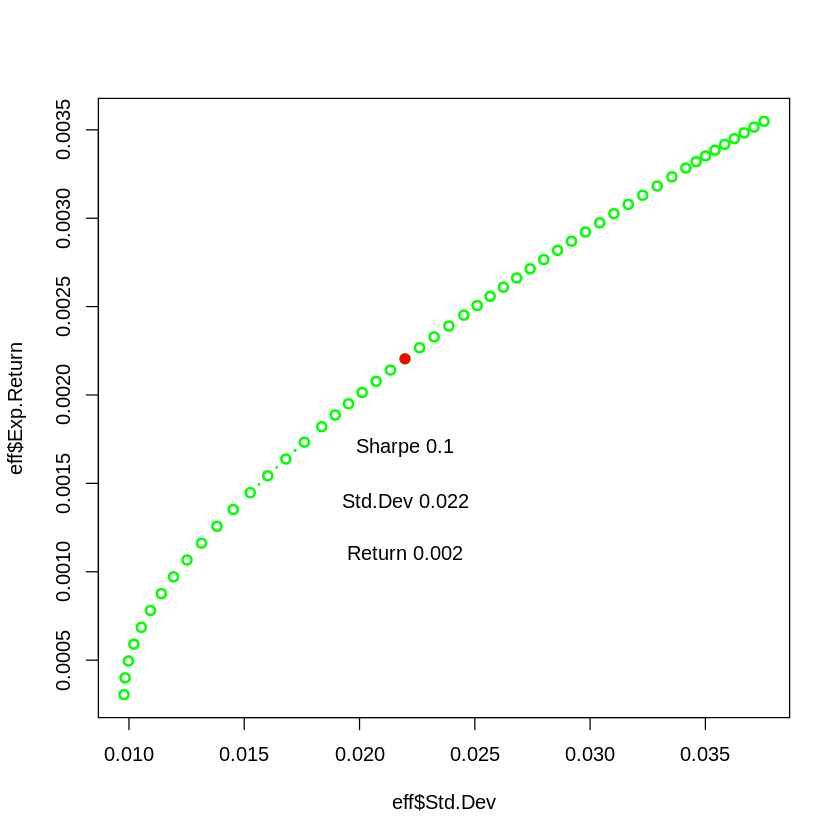

In [53]:
eff.optimal.point <- eff[eff$sharpe==max(eff$sharpe),]

plot(eff$Std.Dev,eff$Exp.Return,type = 'b',pch =21,col = 'green',lwd = 2)
points(eff.optimal.point$Std.Dev,eff.optimal.point$Exp.Return,pch = 20,col = 'red',lwd = 4)
text(eff.optimal.point$Std.Dev,eff.optimal.point$Exp.Return-0.0005,paste('Sharpe',round(eff.optimal.point$sharpe,3)))
text(eff.optimal.point$Std.Dev,eff.optimal.point$Exp.Return-0.0008,paste('Std.Dev',round(eff.optimal.point$Std.Dev,3)))
text(eff.optimal.point$Std.Dev,eff.optimal.point$Exp.Return-0.0011,paste('Return',round(eff.optimal.point$Exp.Return,3)))

In [54]:
eff.optimal.point

,CDNS,CDW,CE,CF,CFG,CHD,CHRW,CHTR,CI,CINF,Std.Dev,Exp.Return,sharpe
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23,0.45,0.06999395,0.2042849,0.1710069,-0.1698176,0.4442004,-0.204159,-0.7853016,0.45,0.369792,0.02197209,0.002204486,0.1003312


In [55]:
   eff.optimal.point<-eff.optimal.point[1:10]
   sabs <- sum(abs(eff.optimal.point))
   norm_eff.optimal.point <- eff.optimal.point/sabs
   sum(abs(norm_eff.optimal.point))

[1] 1

In [56]:
N <- 1000000
(d_money <- norm_eff.optimal.point*N)

,CDNS,CDW,CE,CF,CFG,CHD,CHRW,CHTR,CI,CINF
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23,135601.1,21091.69,61558.36,51530.51,-51172.12,133853.5,-61520.42,-236639.5,135601.1,111431.6


In [57]:
d_money

,CDNS,CDW,CE,CF,CFG,CHD,CHRW,CHTR,CI,CINF
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23,135601.1,21091.69,61558.36,51530.51,-51172.12,133853.5,-61520.42,-236639.5,135601.1,111431.6


In [58]:
histData[nData,]

,CDNS,CDW,CE,CF,CFG,CHD,CHRW,CHTR,CI,CINF
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
587,281.63,219.56,157.17,74.09,35.39,106.11,81.2,265.93,341.5,116.94


In [59]:
nData <- dim(sample.xts)[1]
(portfolio <- as.integer (d_money/ histData[nData,]))

[1]   481    96   391   695 -1445  1261  -757  -889   397   952

In [60]:
sum(abs(portfolio)*histData[nData,])

[1] 999213.6

In [61]:
res <- rep(0,Lag)
for (i in 1 :Lag)
{
  change <- histData[nData+i,]-histData[nData,]
  res[i]<-sum(portfolio*change)
  print(paste(Dates[nData+i],' ',res[i]))
}

[1] "2024-05-06   -739.582775115967"
[1] "2024-05-07   6575.98229217529"
[1] "2024-05-08   -755.023487091064"
[1] "2024-05-09   10955.1540412903"
[1] "2024-05-10   -1777.80359268188"


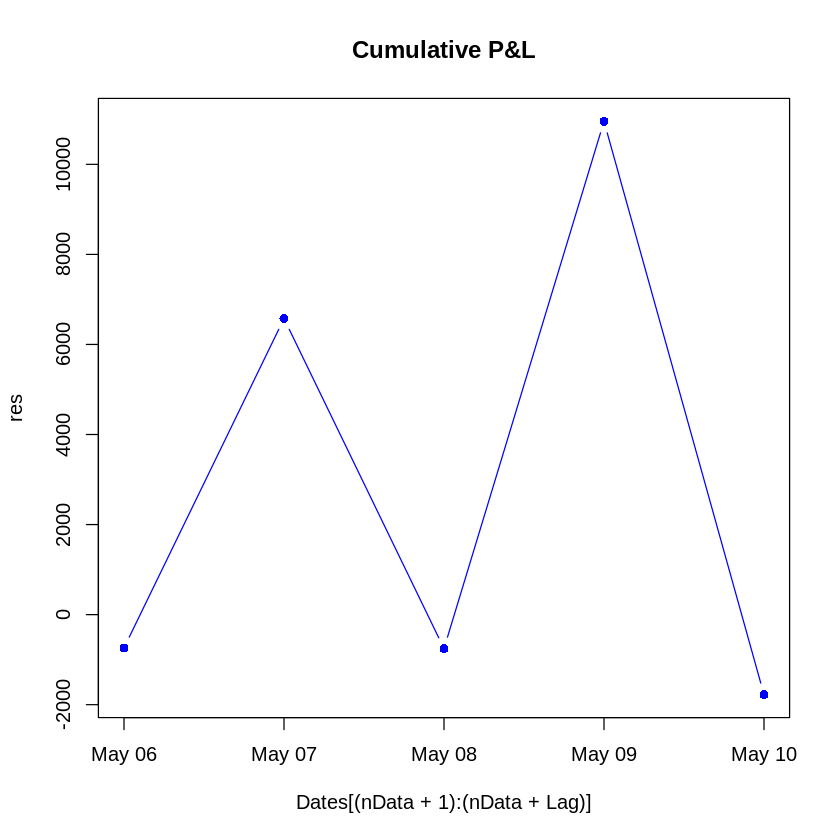

In [62]:
  plot(Dates[(nData+1):(nData+Lag)], res,main='Cumulative P&L',type="b",col = 'blue',pch=16)